## About this Dataset
+ Context

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

+ Account Balance: No account (1), None (No balance) (2), Some Balance (3)

+ Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

+ Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

+ Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

+ Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

+ No of Credits at this bank: 1, More than 1

+ Guarantor: None, Yes

+ Concurrent Credits: Other Banks or Dept Stores, None

+ ForeignWorker variable may be dropped from the study

+ Purpose of Credit: New car, Used car, Home Related, Other

https://online.stat.psu.edu/stat508/resource/analysis/gcd

Content

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

Acknowledgements
https://online.stat.psu.edu/stat508/resource/analysis/gcd

Photo by Alice Pasqual on Unsplash

Inspiration
Unemployment in time of crisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('german.csv', sep=';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
data.shape

(1000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [5]:
data.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [6]:
data.isnull().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

In [7]:
# Target
y = data.Creditability

# Features
X = data.drop('Creditability', axis = 1)

In [8]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

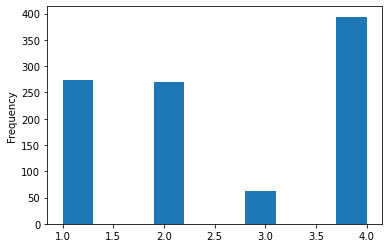

In [9]:
X.Account_Balance.plot(kind = 'hist')

In [10]:
X['Account_Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account_Balance, dtype: int64

In [11]:
tran_acc_bal = X['Account_Balance'].value_counts() / len(X) * 100
tran_acc_bal

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account_Balance, dtype: float64

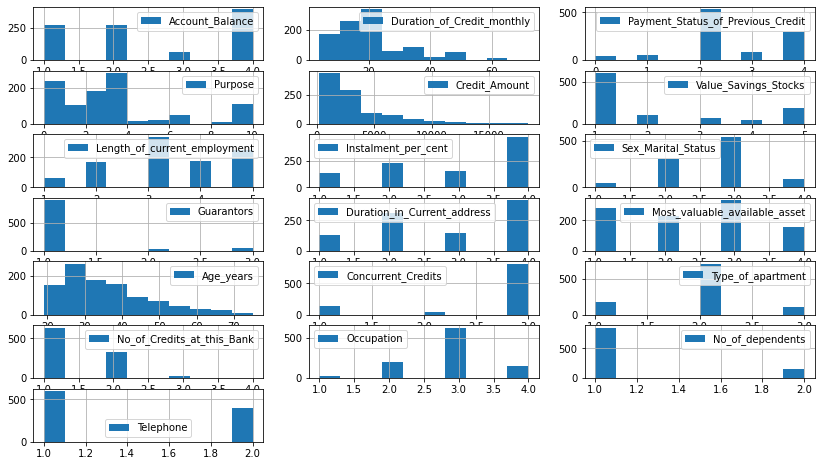

In [12]:
plt.figure(figsize = (14, 8))
for i, j in zip(range(1, 20), features):
    
    plt.subplot(7, 3, i)
    
    X[j].hist(label = j)
    
    plt.legend()

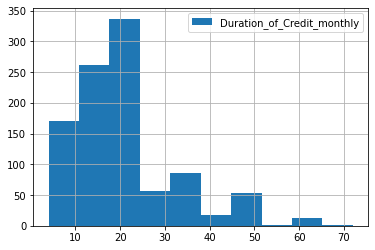

In [13]:
X['Duration_of_Credit_monthly'].hist(label = features[1])
plt.legend()

In [14]:
X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

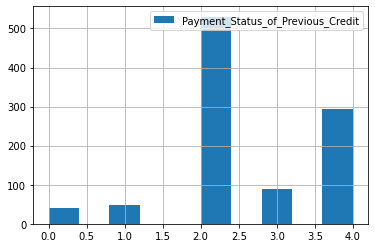

In [15]:
X['Payment_Status_of_Previous_Credit'].hist(label = [features[2]])
plt.legend()

In [16]:
X['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64

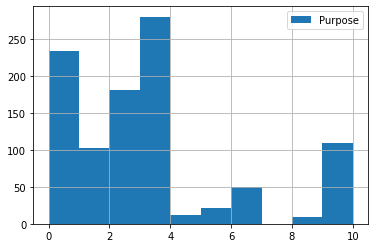

In [17]:
X['Purpose'].hist(label = features[3])
plt.legend()

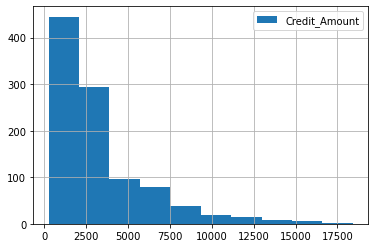

In [18]:
X['Credit_Amount'].hist(label = features[4])
plt.legend()

In [19]:
X['Credit_Amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64

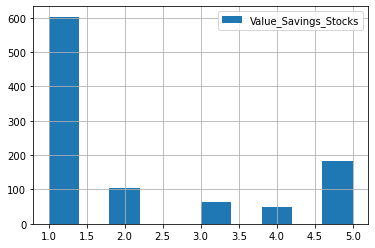

In [20]:
X['Value_Savings_Stocks'].hist(label = features[5])
plt.legend()

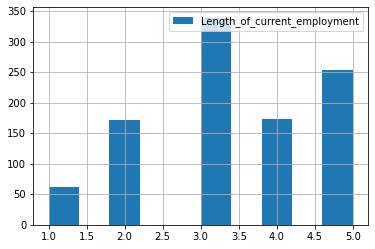

In [21]:
X['Length_of_current_employment'].hist(label = features[6])
plt.legend()

<AxesSubplot:>

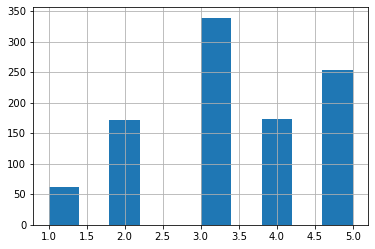

In [22]:
X['Length_of_current_employment'].hist(label = 'Length_of_current_employment')

<AxesSubplot:>

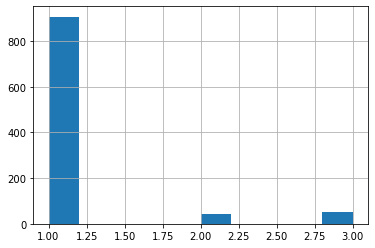

In [23]:
X['Guarantors'].hist(label = 'Guarantors')

<AxesSubplot:>

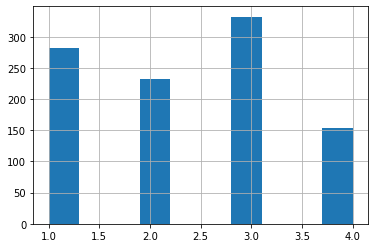

In [24]:
X['Most_valuable_available_asset'].hist(label = 'Most_valuable_available_asset')

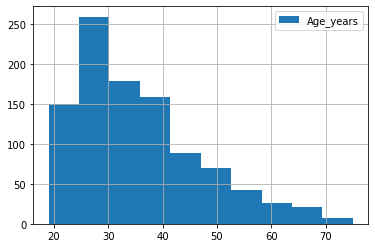

In [25]:
X['Age_years'].hist(label = 'Age_years')
plt.legend()

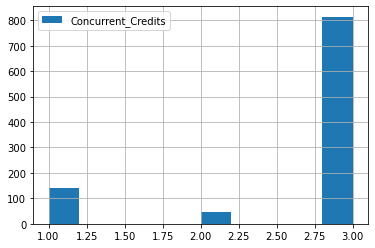

In [26]:
X['Concurrent_Credits'].hist(label = 'Concurrent_Credits')
plt.legend()

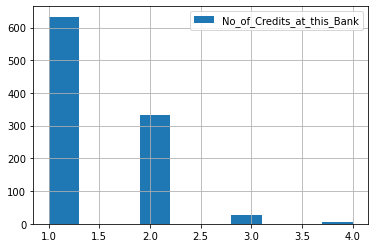

In [27]:
X['No_of_Credits_at_this_Bank'].hist(label = 'No_of_Credits_at_this_Bank')
plt.legend()

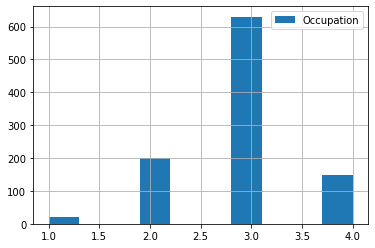

In [28]:
X['Occupation'].hist(label = 'Occupation')
plt.legend()

<AxesSubplot:xlabel='Age_years', ylabel='Credit_Amount'>

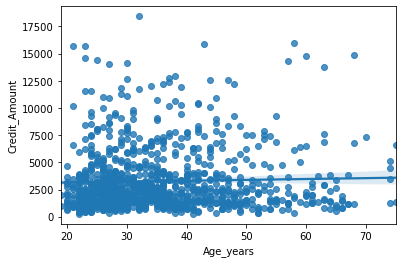

In [29]:
sns.regplot(x = X['Age_years'], y = X['Credit_Amount'])

## Predictive Modelling

In [30]:
# Tree-based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Distance-based
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Validation
from sklearn import metrics

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

+ ## DecisionTree

In [32]:
model_dt = DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
preds_dt = model_dt.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_dt)
print(f'DecisionTree Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_dt)
print(class_report)

DecisionTree Accuracy: 0.695
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        60
           1       0.79      0.76      0.78       140

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.70      0.69      0.70       200



+ ## RandomForest

In [34]:
model_rf = RandomForestClassifier(random_state = 11)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [35]:
preds_rf = model_rf.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_rf)
print(f'RandomForest Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_rf)
print(class_report)

RandomForest Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.71      0.45      0.55        60
           1       0.80      0.92      0.85       140

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200



+ ## LogisticRegression

In [36]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
preds_lr = model_lr.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_lr)
print(f'LogisticRegression Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_lr)
print(class_report)

LogisticRegression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.68      0.45      0.54        60
           1       0.79      0.91      0.85       140

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.69       200
weighted avg       0.76      0.77      0.75       200



+ ## SupportVector

In [38]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [39]:
preds_svc = model_svc.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_svc)
print(f'SupportVector Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_svc)
print(class_report)

SupportVector Accuracy: 0.705
              precision    recall  f1-score   support

           0       0.56      0.08      0.14        60
           1       0.71      0.97      0.82       140

    accuracy                           0.70       200
   macro avg       0.63      0.53      0.48       200
weighted avg       0.67      0.70      0.62       200



+ ## KNeighbors

In [40]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
preds_knn = model_knn.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_knn)
print(f'KNeighbors Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_knn)
print(class_report)

KNeighbors Accuracy: 0.665
              precision    recall  f1-score   support

           0       0.40      0.23      0.29        60
           1       0.72      0.85      0.78       140

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.62      0.67      0.63       200



## Deep Learning
+ Deep Neural Networks using Tensorflow and Keras

In [42]:
from tensorflow.keras import Sequential, layers, callbacks

In [43]:
model = Sequential([
    layers.Dense(24, activation = 'relu', input_shape = [20]),
    layers.Dense(24, activation = 'relu'),
    layers.Dense(24, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [44]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 30,
    restore_best_weights = True
)

In [45]:
model_dl = model.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 88,
                      epochs = 1000)

Epoch 1/1000
10/10 [==============================] - 1s 56ms/step - loss: 66.1172 - val_loss: 27.2706
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 15.6398 - val_loss: 4.4530
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 7.1833 - val_loss: 4.6495
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.7931 - val_loss: 3.3188
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.7615 - val_loss: 1.5272
Epoch 6/1000
10/10 [==============================] - 0s 4ms/step - loss: 2.4685 - val_loss: 2.8025
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.4193 - val_loss: 1.6444
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2237 - val_loss: 1.1750
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.3231 - val_loss: 0.6526
Epoch 10/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.8172 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 2.2343 - val_loss: 1.8275
Epoch 83/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2882 - val_loss: 1.7806
Epoch 84/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.6474 - val_loss: 2.5547
Epoch 85/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8041 - val_loss: 1.9002
Epoch 86/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.4499 - val_loss: 0.6669
Epoch 87/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8746 - val_loss: 1.3957
Epoch 88/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.4469 - val_loss: 2.6570
Epoch 89/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.6660 - val_loss: 1.2232
Epoch 90/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.3620 - val_loss: 2.4023
Epoch 91/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.7003 - val_loss: 1.2258
Epoc

10/10 [==============================] - 0s 5ms/step - loss: 0.8910 - val_loss: 4.1371
Epoch 163/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.1996 - val_loss: 2.1205
Epoch 164/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.7728 - val_loss: 0.6246
Epoch 165/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.9650 - val_loss: 0.6682
Epoch 166/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6620 - val_loss: 0.7279
Epoch 167/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6230 - val_loss: 1.9238
Epoch 168/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0800 - val_loss: 0.5275
Epoch 169/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5916 - val_loss: 0.6688
Epoch 170/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.6083 - val_loss: 0.5258
Epoch 171/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8678 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 0.7958 - val_loss: 0.9537
Epoch 243/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0903 - val_loss: 1.8859
Epoch 244/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2367 - val_loss: 1.8541
Epoch 245/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.9055 - val_loss: 2.3089
Epoch 246/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.5858 - val_loss: 0.5711
Epoch 247/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.9664 - val_loss: 1.0839
Epoch 248/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0605 - val_loss: 2.6719
Epoch 249/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.6123 - val_loss: 0.8056
Epoch 250/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0933 - val_loss: 1.2184
Epoch 251/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.1193 - val_loss: 2.

10/10 [==============================] - 0s 5ms/step - loss: 0.5538 - val_loss: 0.5861
Epoch 323/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7863 - val_loss: 0.5233
Epoch 324/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8298 - val_loss: 1.5307
Epoch 325/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.3371 - val_loss: 0.7166
Epoch 326/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8448 - val_loss: 0.9553
Epoch 327/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.1093 - val_loss: 1.0621
Epoch 328/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8715 - val_loss: 0.9624
Epoch 329/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7727 - val_loss: 1.3431
Epoch 330/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.9054 - val_loss: 1.6279
Epoch 331/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.1515 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 1.0687 - val_loss: 0.9236
Epoch 403/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6078 - val_loss: 1.1687
Epoch 404/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7172 - val_loss: 3.8014
Epoch 405/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.2777 - val_loss: 0.9424
Epoch 406/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7772 - val_loss: 1.9892
Epoch 407/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2240 - val_loss: 0.6047
Epoch 408/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6910 - val_loss: 0.5843
Epoch 409/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5525 - val_loss: 3.2349
Epoch 410/1000
10/10 [==============================] - 0s 5ms/step - loss: 3.0217 - val_loss: 2.3577
Epoch 411/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.8651 - val_loss: 2.

10/10 [==============================] - 0s 5ms/step - loss: 1.1745 - val_loss: 1.2881
Epoch 483/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7811 - val_loss: 0.5038
Epoch 484/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.0500 - val_loss: 1.1949
Epoch 485/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.2600 - val_loss: 1.3233
Epoch 486/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8345 - val_loss: 1.1121
Epoch 487/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0082 - val_loss: 2.2670
Epoch 488/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.2007 - val_loss: 2.1277
Epoch 489/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.6447 - val_loss: 2.2731
Epoch 490/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2391 - val_loss: 1.7082
Epoch 491/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8197 - val_loss: 1.

10/10 [==============================] - 0s 5ms/step - loss: 2.4732 - val_loss: 1.7542
Epoch 563/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2495 - val_loss: 0.8362
Epoch 564/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.1964 - val_loss: 0.6434
Epoch 565/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7179 - val_loss: 1.5587
Epoch 566/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.6562 - val_loss: 0.5230
Epoch 567/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.7396 - val_loss: 3.4307
Epoch 568/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.7621 - val_loss: 1.5674
Epoch 569/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.2539 - val_loss: 0.5623
Epoch 570/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5199 - val_loss: 0.7383
Epoch 571/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5855 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 1.0430 - val_loss: 0.9540
Epoch 643/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6262 - val_loss: 0.5775
Epoch 644/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6869 - val_loss: 0.5476
Epoch 645/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.5940
Epoch 646/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - val_loss: 1.1083
Epoch 647/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7549 - val_loss: 0.5599
Epoch 648/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5218 - val_loss: 0.5319
Epoch 649/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5027 - val_loss: 0.6322
Epoch 650/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6293 - val_loss: 0.8093
Epoch 651/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6188 - val_loss: 0.

10/10 [==============================] - 0s 4ms/step - loss: 0.7745 - val_loss: 1.3214
Epoch 723/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.0765 - val_loss: 1.4773
Epoch 724/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.9285 - val_loss: 0.6198
Epoch 725/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8611 - val_loss: 0.8171
Epoch 726/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8092 - val_loss: 2.4824
Epoch 727/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.4381 - val_loss: 0.5704
Epoch 728/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5498 - val_loss: 0.5103
Epoch 729/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5432 - val_loss: 1.0399
Epoch 730/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8155 - val_loss: 0.8010
Epoch 731/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5223 - val_loss: 0.

10/10 [==============================] - 0s 5ms/step - loss: 1.0041 - val_loss: 1.1045
Epoch 803/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2114 - val_loss: 1.7540
Epoch 804/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.1174 - val_loss: 1.8233
Epoch 805/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2337 - val_loss: 1.9600
Epoch 806/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.3214 - val_loss: 1.7052
Epoch 807/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.3903 - val_loss: 1.1916
Epoch 808/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.8219 - val_loss: 0.9822
Epoch 809/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.9437 - val_loss: 1.7041
Epoch 810/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.9637 - val_loss: 2.5715
Epoch 811/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.5649 - val_loss: 1.

10/10 [==============================] - 0s 5ms/step - loss: 0.5734 - val_loss: 1.1686
Epoch 883/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7731 - val_loss: 0.5088
Epoch 884/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5341 - val_loss: 0.7955
Epoch 885/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.7363 - val_loss: 0.8526
Epoch 886/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5512 - val_loss: 0.6158
Epoch 887/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5427 - val_loss: 0.6591
Epoch 888/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6989 - val_loss: 0.8284
Epoch 889/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6902 - val_loss: 1.0847
Epoch 890/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.2104 - val_loss: 0.7844
Epoch 891/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.5642 - val_loss: 2.

10/10 [==============================] - 0s 5ms/step - loss: 0.8278 - val_loss: 0.7041
Epoch 963/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0106 - val_loss: 0.5006
Epoch 964/1000
10/10 [==============================] - 0s 4ms/step - loss: 1.0516 - val_loss: 0.9195
Epoch 965/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6935 - val_loss: 0.5018
Epoch 966/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.5265 - val_loss: 0.5703
Epoch 967/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.5607 - val_loss: 0.7234
Epoch 968/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6709 - val_loss: 1.2740
Epoch 969/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.1566 - val_loss: 0.7268
Epoch 970/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.7550 - val_loss: 0.8918
Epoch 971/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.7673 - val_loss: 0.